__Keras API Initiative__

__Introduction to TensorFlow__

TensorFlow is an open-source machine learning framework developed by Google. It is designed to simplify the process of developing and training machine learning models, making it accessible to both beginners and experienced practitioners.

_Key Features of TensorFlow_

- __Flexibility__: TensorFlow supports a wide range of machine learning tasks, from simple linear regression to complex deep learning models. It allows for deployment across various platforms including CPUs, GPUs, and TPUs.

- __Ease of Use__: The high-level Keras API, integrated within TensorFlow, provides an intuitive interface for building and training models. This makes it easier to prototype and experiment with different architectures.

- __Extensive Ecosystem__: TensorFlow boasts a rich ecosystem of tools and libraries, such as TensorFlow Lite for mobile and embedded devices, TensorFlow.js for in-browser machine learning, and TensorFlow Extended (TFX) for production-level machine learning pipelines.

- __Community and Support__: As one of the most popular machine learning frameworks, TensorFlow has a vast and active community. This ensures a wealth of resources, tutorials, and support for users at all levels.

__Core Concepts__

- __Tensors__: The fundamental data structure in TensorFlow, tensors are multi-dimensional arrays that flow through the computational graph. Each operation transforms these tensors, leading to the desired output.

- __Computational Graphs__: TensorFlow uses computational graphs to represent the flow of data and operations. This graph-based approach allows for efficient computation, particularly on parallel and distributed systems.

- __Eager Execution__: TensorFlow’s eager execution mode provides immediate feedback by executing operations as they are called. This makes debugging and iteration more straightforward.

__Applications__

TensorFlow is versatile and can be applied to various machine learning problems, including:

- __Image Recognition__: Building convolutional neural networks (CNNs) for tasks like image classification and object detection.
- __Natural Language Processing__: Developing models for language translation, sentiment analysis, and text generation.
- __Time Series Analysis__: Implementing recurrent neural networks (RNNs) for forecasting and sequence prediction.
- __Reinforcement Learning__: Creating agents that learn to make decisions by interacting with their environment.

In conclusion, TensorFlow is a powerful and flexible framework that can accelerate the development and deployment of machine learning models. Its comprehensive features and strong community support make it an excellent choice for both ners and experts in the field.

__Our Goal__


Using historical loan data that includes information on whether borrowers defaulted (charge-off), we aim to build a predictive model to determine the likelihood of a borrower repaying their loan. This model will help us evaluate the repayment probability for new potential customers. It is crucial to consider classification metrics when assessing the model's performance.

The "loan_status" column contains our target label.

LendingClub, based in San Francisco, California, is a leading US peer-to-peer lending company. It made history as the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC) and to facilitate loan trading on a secondary market. LendingClub is the largest peer-to-peer lending platform globally.

__Data Overview__

Click on the link below for information about this particular dataset
https://www.kaggle.com/code/aonursert/tensorflow-keras-project?scriptVersionId=36290319&cellId=2

__Starter Code__

In [2]:
import pandas as pd
# Read the CSV file into a DataFrame
data_info = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_info.csv', index_col='LoanStatNew')

print(data_info.loc['revol_util']['Description'])



Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
feat_info('mort_acc')

Number of mortgage accounts.


__Loading the data and other imports__

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

__Segment 1: Exploratory Data Analysis__

__Overall Goal__: Get an understanding for which variables are important, view
summary statistics, and visualize the data

__Task__: Since we will be attempting to predict loan_status, I created a 
countplot as shown below.

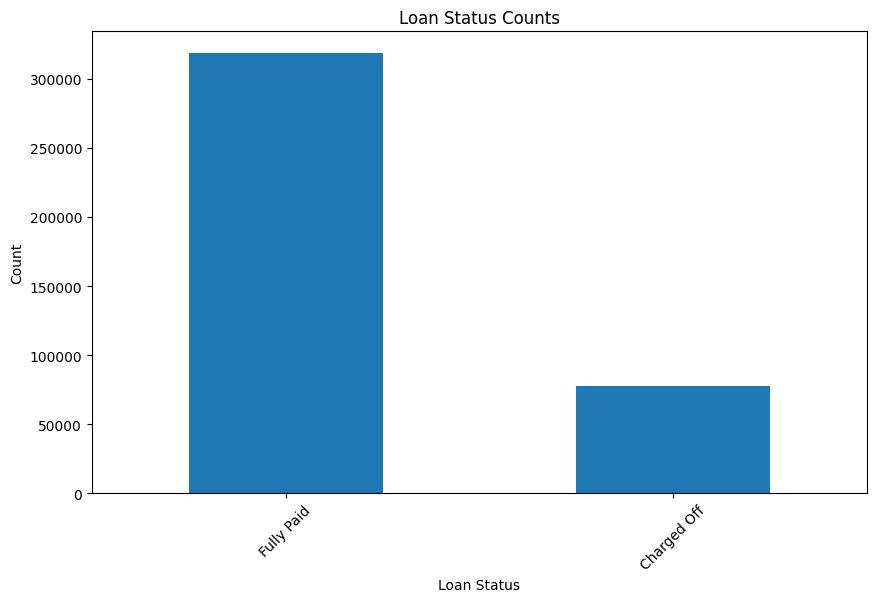

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "loan_status" to categorical data type
df["loan_status"] = df["loan_status"].astype('category')

# Get the counts of each unique value in "loan_status"
status_counts = df["loan_status"].value_counts()

# Plot the counts using Matplotlib
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar')
plt.title("Loan Status Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


__Task__: Create a histogram of the loan_amnt column

C:\Users\Owner\AppData\Local\Temp\ipykernel_6204\3266286701.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["loan_amnt"], kde=False)


<Axes: xlabel='loan_amnt'>

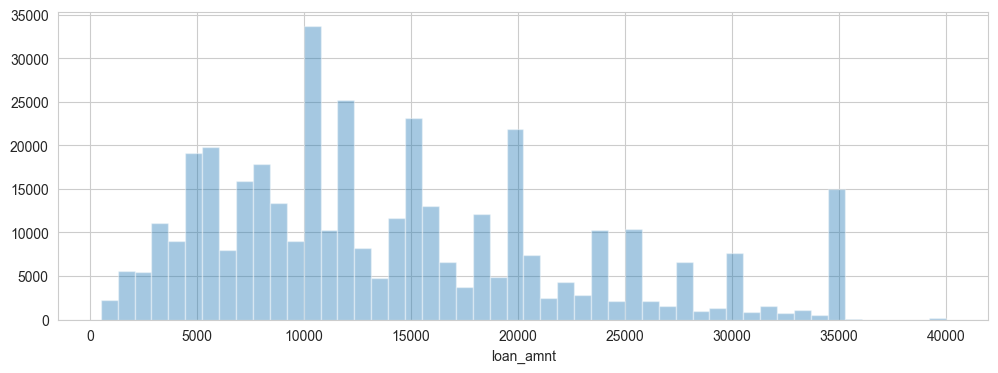

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,4))
sns.distplot(df["loan_amnt"], kde=False)

In [9]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


__Task__: Lets explore correlation between the continous numeric  variables. Calculate the correlation between all continous numeric variables using .corr()method.

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Drop columns that are not suitable for modeling or require additional preprocessing
df.drop(columns=['emp_title', 'title', 'issue_d', 'earliest_cr_line', 'address'], inplace=True)

# Convert categorical columns to one-hot encoding
df = pd.get_dummies(df, columns=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
                                  'loan_status', 'purpose', 'initial_list_status', 'application_type'])

# Convert 'sub_grade' column to one-hot encoding
df = pd.get_dummies(df, columns=['sub_grade'])

# Handle missing values
df.fillna(0, inplace=True)  # Filling missing values with 0, you can choose a different strategy if needed

# Now, let's check the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)




              loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt      1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate       0.168921  1.000000     0.162758   -0.056771  0.079038   
installment    0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc     0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti            0.016636  0.079038     0.015786   -0.081685  1.000000   
...                 ...       ...          ...         ...       ...   
sub_grade_G1   0.039714  0.137912     0.040316    0.004775  0.004517   
sub_grade_G2   0.033544  0.118871     0.034648    0.001699  0.005410   
sub_grade_G3   0.032224  0.104247     0.033163    0.003318  0.003337   
sub_grade_G4   0.027905  0.086611     0.028853    0.005917  0.003607   
sub_grade_G5   0.023786  0.081416     0.024953    0.005291  0.003466   

              open_acc   pub_rec  revol_bal  revol_util  total_acc  ...  \
loan_amnt     0.198556 -0.077779   0.328320    0.100286   0.

__Task__: Visualization using Heatmap

C:\Users\Owner\AppData\Local\Temp\ipykernel_6204\3797389866.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Owner\AppData\Local\Temp\ipykernel_6204\3797389866.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


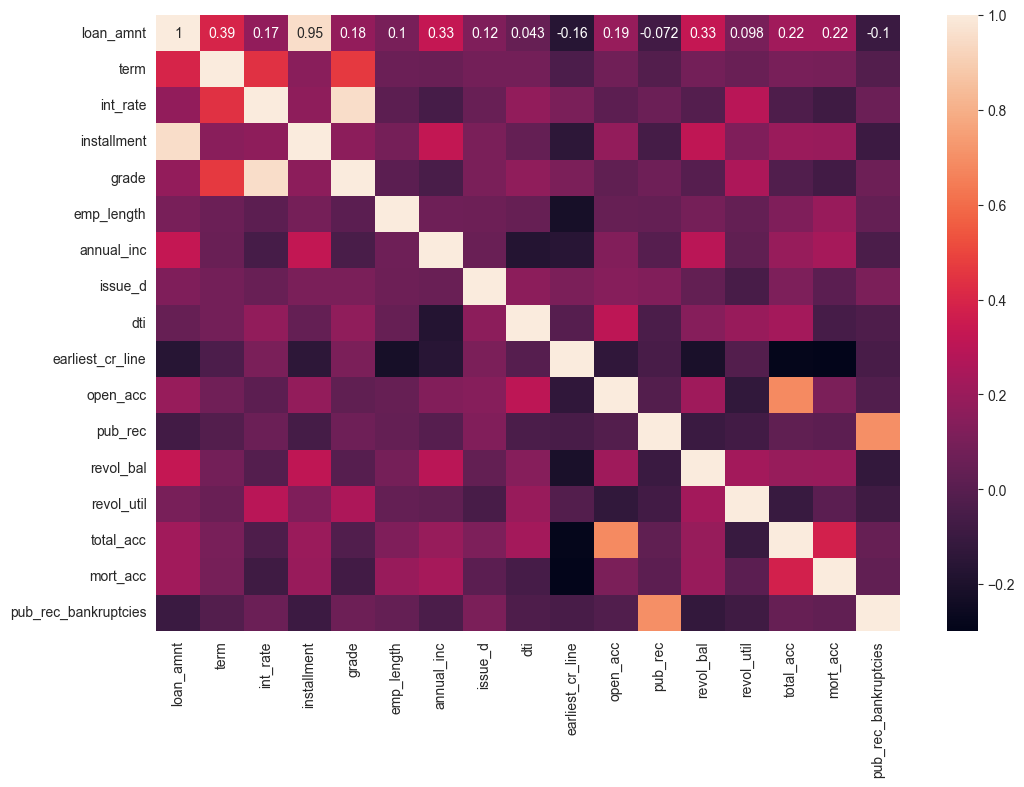

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read the dataset
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Drop rows with non-numeric values in columns that should be numeric
numeric_columns = ['term', 'emp_length']
df = df.dropna(subset=numeric_columns)

# Convert 'term' column to numerical values
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

# Convert categorical columns to numerical values
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['grade'] = df['grade'].map(grade_mapping)

# Convert 'emp_length' to numerical values
def convert_emp_length(x):
    if pd.isnull(x):
        return x
    elif '+' in x:
        return 10
    elif '<' in x:
        return 0
    else:
        return int(x.split()[0])

df['emp_length'] = df['emp_length'].apply(convert_emp_length)

# Convert non-numeric columns to categorical or drop them
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
for col in non_numeric_columns:
    if col in ['issue_d', 'earliest_cr_line']:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    else:
        df = df.drop(columns=[col])

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()






__Task__: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there's duplicate information here?

In [12]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Get information about the 'installment' column
installment_info = df['installment'].describe()
print(installment_info)


count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64


In [13]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

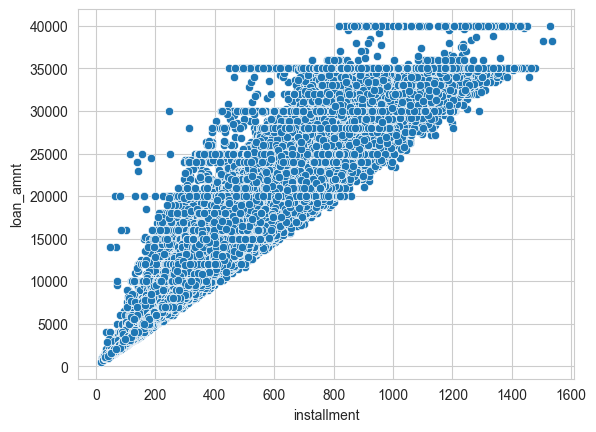

In [14]:
sns.scatterplot(x="installment", y="loan_amnt", data=df)

__Task__: Create a boxplot showing the relationship between the loan_status and the Loan Amount.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

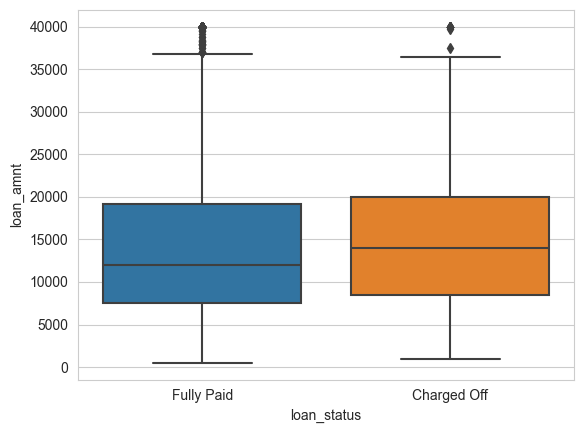

In [15]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

__Task__: Calculate the Summary statistics for the loan amount, grouped by the loan_status.

In [16]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


__Task__: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [17]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [18]:
import numpy as np
np.sort(df["grade"].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [19]:
np.sort(df["sub_grade"].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

__Task__: Create a countplot per grade. Set the hue to the loan_status label.

<Axes: xlabel='grade', ylabel='count'>

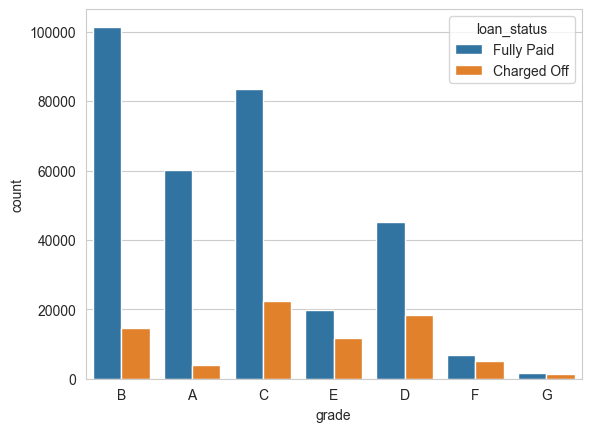

In [20]:
sns.countplot(x="grade", hue="loan_status", data=df)

__Task__: Display a count plot per subgrade. You may need to resize for this plot and reorder the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"

<Axes: xlabel='sub_grade', ylabel='count'>

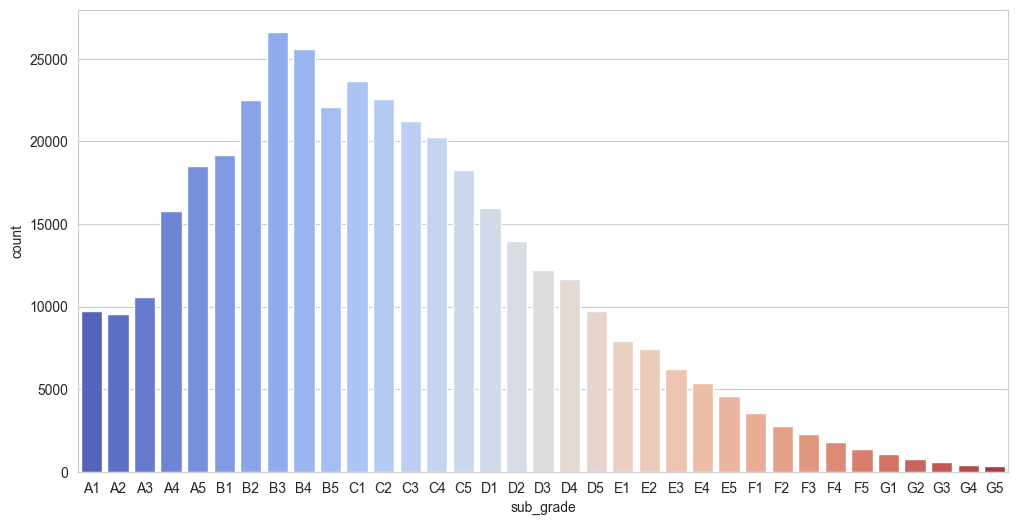

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x="sub_grade", data=df, palette="coolwarm", order=np.sort(df["sub_grade"].unique()))

<Axes: xlabel='sub_grade', ylabel='count'>

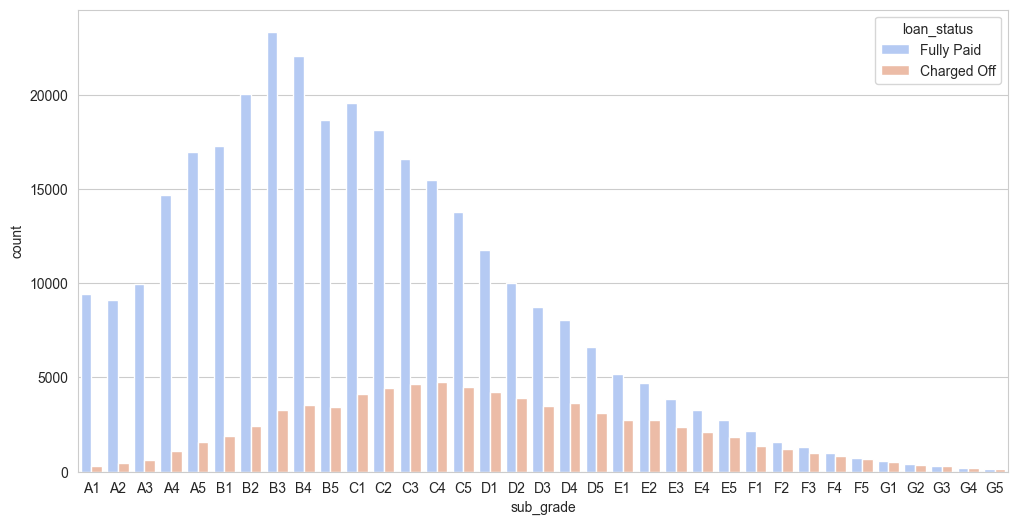

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x="sub_grade", hue="loan_status", data=df, palette="coolwarm", order=np.sort(df["sub_grade"].unique()))

__Task__: It looks like F and G subgrades don't get paid back that often. Isolate those and recreate the countplot just for those subgrades

<Axes: xlabel='sub_grade', ylabel='count'>

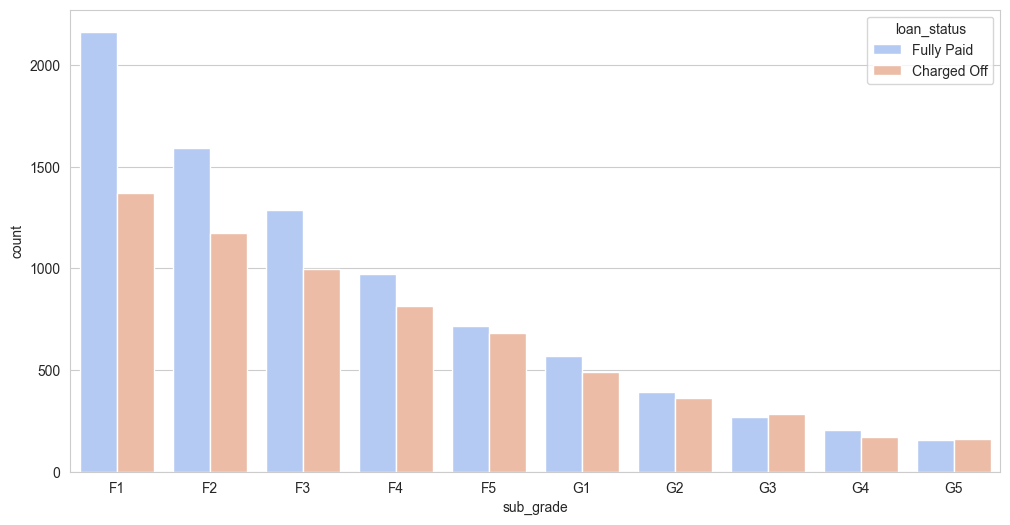

In [23]:
df_FG = df[(df["grade"] == "F") | (df["grade"] == "G")]
plt.figure(figsize=(12,6))
sns.countplot(x="sub_grade", hue="loan_status", data=df_FG, palette="coolwarm", order=np.sort(df_FG["sub_grade"].unique()))

__Task__: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [24]:
df["loan_repaid"] = pd.get_dummies(df["loan_status"], drop_first=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",True
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",True
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",True
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",True
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",False


__Challenge Task: Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.__

C:\Users\Owner\AppData\Local\Temp\ipykernel_6204\1534357370.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length'] = df['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10})


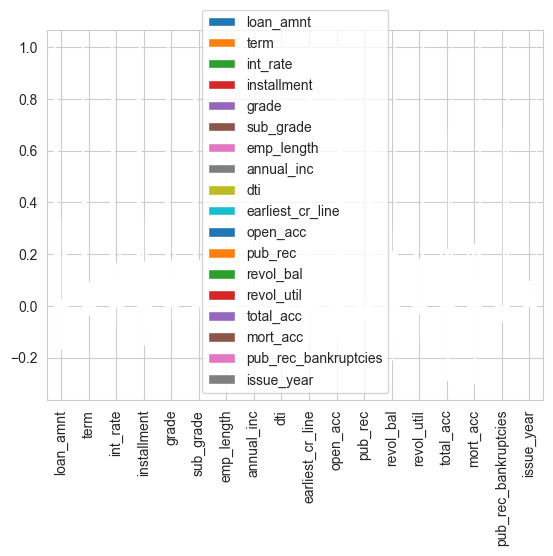

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Drop rows with missing values in the DataFrame
df.dropna(inplace=True)

# Preprocess 'term' column
df['term'] = df['term'].astype(str).str.replace(' months', '').astype(int)

# Apply label encoding to 'grade' and 'sub_grade' columns
label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])

# Apply label encoding to 'emp_length' column
df['emp_length'] = df['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10})

# Convert 'earliest_cr_line' to year
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y').dt.year

# Extract year from 'issue_d' and convert to integer
df['issue_year'] = pd.to_datetime(df['issue_d'], format='%b-%Y').dt.year

# Drop columns with non-numeric values
non_numeric_cols = ['emp_title', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'address', 'issue_d']
df.drop(non_numeric_cols, axis=1, inplace=True)

# Check if target variable exists
target_variable = 'loan_repaid'
if target_variable in df.columns:
    # Plot correlation for target variable
    df.corr()[target_variable][:-1].sort_values().plot(kind="bar")
else:
    # Plot correlation among all numeric features
    df.corr().plot(kind="bar")

plt.show()

__Segment 2: Data PreProcessing__

__Segment Goals__: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [26]:
df.head

<bound method NDFrame.head of         loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
0         10000.0    36     11.44       329.48      1          8          10   
1          8000.0    36     11.99       265.68      1          9           4   
2         15600.0    36     10.49       506.97      1          7           0   
3          7200.0    36      6.49       220.65      0          1           6   
4         24375.0    60     17.27       609.33      2         14           9   
...           ...   ...       ...          ...    ...        ...         ...   
396024     6000.0    36     13.11       202.49      1          8           5   
396025    10000.0    60     10.99       217.38      1          8           2   
396026    21000.0    36     12.29       700.42      2         10           5   
396027     5000.0    36      9.99       161.32      1          5          10   
396028    21000.0    60     15.31       503.02      2         11          10   

        a

__Missing Data__

Let's explore the missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard or fill in the missing data.

__Task__: What is the length of the dataframe?

In [27]:
import pandas as pd
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
len(df)

396030

__Task__: Create a Series that displays the total count of missing values per column.

In [28]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

__Task__: Convert this Series to be in term of percentage of the total DataFrame

In [29]:
import pandas as pd
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
df.isnull().mean()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004434
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
dtype: float64

__Task__: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook

In [30]:
import pandas as pd
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')
def feat_info(feature_name):
    # Define a dictionary containing information about features
    feature_info = {
        'emp_title': 'Employer title',
        'emp_length': 'Employment length in years',
        # Add more feature descriptions as needed
    }
    
    # Print information about the specified feature
    print(feature_info.get(feature_name, 'Feature not found'))

# Now you can use the feat_info function
feat_info("emp_title")
print()
feat_info("emp_length")

Employer title

Employment length in years


__Task__: How many unique employment job titles are there?

In [31]:
df["emp_title"].nunique()

173105

In [32]:
df["emp_title"].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

__Task__: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [ ]:
df.drop("emp_title", axis=1, inplace=True)

__Task__: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.

In [33]:
df["emp_length"].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [34]:
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<Axes: xlabel='emp_length', ylabel='count'>

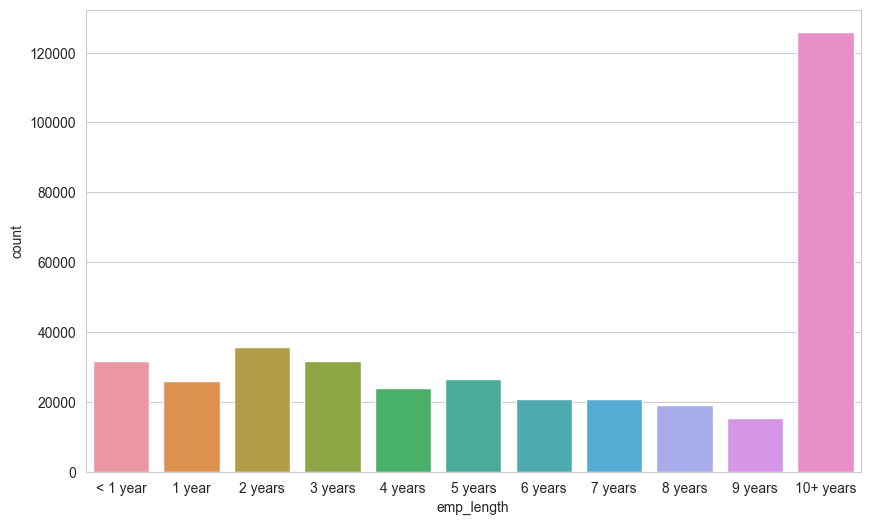

In [35]:
sort_emp = ['< 1 year',
'1 year',
'2 years',
'3 years',
'4 years',
'5 years',
'6 years',
'7 years',
'8 years',
'9 years',
'10+ years']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x="emp_length", data=df, order=sort_emp)

__Task__: Plot out the countplot with a hue separating Fully Paid vs Charged Off

<Axes: xlabel='emp_length', ylabel='count'>

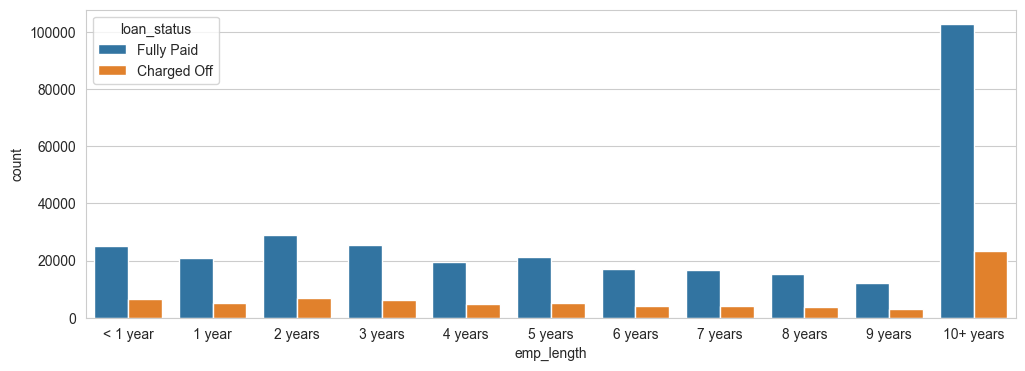

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length", data=df, order=sort_emp, hue="loan_status")

__Challenge Task__: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, What we want is the percentage of charge offs per category. Esssentially informing us what percent of people per employment category didn't pay back their loan. The are a multitude of ways to create this series. Once you've created it visualize it with a bar plot.

In [37]:
emp_co = df[df["loan_status"]=="Charged Off"]. groupby("emp_length").count()["loan_status"]
emp_fp = df[df["loan_status"]=="Fully Paid"].groupby("emp_length").count()["loan_status"]
emp_co/emp_fp    
    


emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

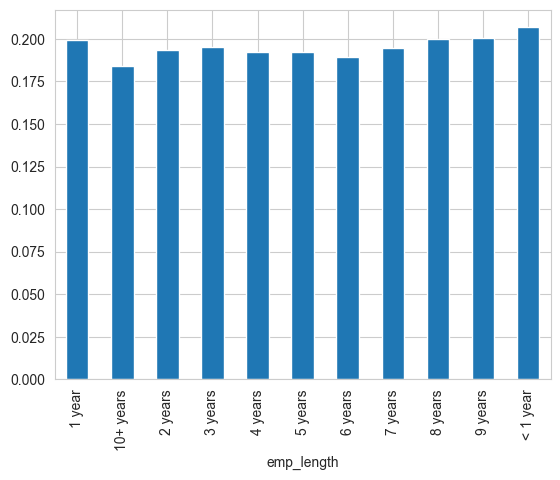

In [38]:
emp_len = emp_co / (emp_co + emp_fp)
emp_len.plot(kind="bar")

__Task__: Charge off rates are extrememly similar across all employment lengths. Go ahead and drop the emp_length column.

In [ ]:
df.drop("emp_length", axis=1, inplace=True)

__Task__: Revisit the Dataframe to see what feature columns still have missing data.

In [39]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

__Task__: Review the title column vs the purpose column. Is this repeated infromation

In [40]:
df["purpose"].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [41]:
feat_info("purpose")

Feature not found


In [42]:
df["title"].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [43]:
feat_info("title")

Feature not found


__Task__: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.

In [ ]:
df.drop("title", axis=1, inplace=True)

__Task__: Find out what the mort_acc feature represents

In [44]:
feat_info("mort_acc")

Feature not found


__Task__: Create a value_counts of the mort_acc column

In [45]:
df["mort_acc"].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

__Task__: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, or we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set Nan as its own category. There is no 100% correct approach. Lets reveiw the other columns to see which most highly correlates to mort_acc.

In [46]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation between "mort_acc" and other numeric columns, and sort the results
correlation_with_mort_acc = numeric_columns.corr()["mort_acc"].sort_values()

# Display the sorted correlations
print(correlation_with_mort_acc)


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64


__Task__: Looks like the total_acc feature correlates with the mort_acc, this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [47]:
total_acc_avg = df.groupby("total_acc")["mort_acc"].mean()
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

__CHALLENGE TASK__: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.

In [48]:
import numpy as np
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    
df["mort_acc"] = df.apply(lambda x: fill_mort_acc(x["total_acc"], x["mort_acc"]), axis=1)
df["mort_acc"].isnull().sum()

0

In [49]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

__TASK__: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().

In [50]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

__Categorical Variables and Dummy Variables__

We're done working with missing data! Now we just need to deal with the string values due to the categorical columns.

__Task__: List all the columns that are currently non-numeric.

In [51]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Let's now go through all the string features to see what we should do with them.
_term feature_

__Task__: Convert the term feature into either a 36 or 60 integer numeric data type using.apply() or .map().

In [52]:
feat_info("term")

Feature not found


In [53]:
df["term"].value_counts()

term
36 months    280484
60 months     90137
Name: count, dtype: int64

In [54]:
df["term"] = df["term"].apply(lambda x: int(x.split()[0]))
df["term"]

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 370621, dtype: int64

In [55]:
df["term"].value_counts()

term
36    280484
60     90137
Name: count, dtype: int64

_grade feature_

__Tasks__: We already know grade is part of sub_grade, so just drop the grade feature.

In [ ]:
df.drop("grade", axis=1, inplace=True)

__Task__: Convert the subgrade into dummy variables. Then concentrate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.

In [56]:
import pandas as pd
dummies = pd.get_dummies(df["sub_grade"], drop_first=True)
dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
df.drop("sub_grade", axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)
df.head

<bound method NDFrame.head of         loan_amnt  term  int_rate  installment grade  \
0         10000.0    36     11.44       329.48     B   
1          8000.0    36     11.99       265.68     B   
2         15600.0    36     10.49       506.97     B   
3          7200.0    36      6.49       220.65     A   
4         24375.0    60     17.27       609.33     C   
...           ...   ...       ...          ...   ...   
396025    10000.0    60     10.99       217.38     B   
396026    21000.0    36     12.29       700.42     C   
396027     5000.0    36      9.99       161.32     B   
396028    21000.0    60     15.31       503.02     C   
396029     2000.0    36     13.61        67.98     C   

                       emp_title emp_length home_ownership  annual_inc  \
0                      Marketing  10+ years           RENT    117000.0   
1                Credit analyst     4 years       MORTGAGE     65000.0   
2                   Statistician   < 1 year           RENT     43057.0   
3

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [59]:
df.select_dtypes(["object"]).columns

Index(['grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

_verification_status, application_type, initial_list_status, purpose_

__Task__: Convert these columns: ['verification_status','application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [ ]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

_home_ownership_

__Task__: Review the value_counts for the home_ownership column.

In [60]:
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    186218
RENT        150714
OWN          33555
OTHER          105
NONE            28
ANY              1
Name: count, dtype: int64

__Task__: Convert these dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE,RENT,OWN,OTHER.Then Cocatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.

In [61]:
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"], "OTHER")
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    186218
RENT        150714
OWN          33555
OTHER          134
Name: count, dtype: int64

In [ ]:
dummies = pd.get_dummies(df["home_ownership"], drop_first=True)
df.drop("home_ownership", axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

_address_

__Task__: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [62]:
df["address"]

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 370621, dtype: object

In [64]:
df["zipcode"] = df["address"].apply(lambda x: x[-5])

In [65]:
df["zipcode"].value_counts()

zipcode
2    95644
0    85766
7    53312
3    52900
4    52356
1    10279
9    10264
8    10100
Name: count, dtype: int64

__Task__: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.

In [ ]:
dummies = pd.get_dummies(df["zipcode"], drop_first=True)
df.drop("zipcode", axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

In [ ]:
df.drop("address", axis=1, inplace=True)

_issue_d_

__Task__: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [66]:
feat_info("issue_d")

Feature not found


In [ ]:
df.drop("issue_d", axis=1, inplace=True)

_earliest_cr_line_

__Task__: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [67]:
feat_info("earliest_cr_line")

Feature not found


In [68]:
df["earliest_cr_line"]

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 370621, dtype: object

In [ ]:
df["earliest_cr_year"] = df["earliest_cr_line"].apply(lambda x: int(x.split("-")[1]))

In [69]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,F2,F3,F4,F5,G1,G2,G3,G4,G5,zipcode
0,10000.0,36,11.44,329.48,B,Marketing,10+ years,RENT,117000.0,Not Verified,...,False,False,False,False,False,False,False,False,False,2
1,8000.0,36,11.99,265.68,B,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,False,False,False,False,False,False,False,False,False,0
2,15600.0,36,10.49,506.97,B,Statistician,< 1 year,RENT,43057.0,Source Verified,...,False,False,False,False,False,False,False,False,False,0
3,7200.0,36,6.49,220.65,A,Client Advocate,6 years,RENT,54000.0,Not Verified,...,False,False,False,False,False,False,False,False,False,0
4,24375.0,60,17.27,609.33,C,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,False,False,False,False,False,False,False,False,False,1


In [ ]:
df.drop("earliest_cr_line", axis=1, inplace=True)

In [70]:
df.select_dtypes(["object"]).columns

Index(['grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address', 'zipcode'],
      dtype='object')

__Train Test Split__

__Task__: Import train_test_split from sklearn.

In [78]:
from sklearn.model_selection import train_test_split

__Task__: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [71]:
df["loan_status"]

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 370621, dtype: object

In [72]:
import pandas as pd

# Assuming you have loaded your DataFrame df from a CSV file or some other source

# Perform some operations to determine the values of the new column 'loan_repaid'
# For example, let's say you want to create a new column based on whether 'loan_status' is 'Fully Paid' or not
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

# Now, the 'loan_repaid' column should have been created with values 1 for 'Fully Paid' loans and 0 otherwise
print(df['loan_repaid'].value_counts())

loan_repaid
1    299363
0     71258
Name: count, dtype: int64


In [ ]:
df.drop("loan_status", axis=1, inplace=True)

In [73]:
df.select_dtypes(["object"]).columns

Index(['grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address', 'zipcode'],
      dtype='object')

__Task__: Set X and y variables to the .values of the features and label.

In [ ]:
X = df.drop("loan_repaid", axis=1).values

In [ ]:
y = df["loan_repaid"].values

__Normalizing the Data__

__TASK__: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakage from the test set so we only fit on the X_train data.

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test - scaler.transform(X_test)

__Creating the model__

__Task__: Run the cell below to import the necessary Keras functions.

__Task__: Build a sequential model that will be used for training on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron.

__Task__: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
df = pd.read_csv('C:/Users/Owner/anaconda3/envs/tf-gpu/lending_club_loan_two.csv')

# Data preprocessing
# Drop rows with missing values
df = df.dropna()

# Encode the target variable
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

# Convert 'term' column to numerical format
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

# Separate features (X) and target (y)
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Convert target to NumPy array
y = y.values.astype('float32')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(79, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam")

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

from tensorflow.keras.models import load_model

model.save('keras_project.h5')

Epoch 1/25


C:\Users\Owner\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 79), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1050/1050 [==============================] - 1815s 2s/step - loss: 0.4591 - val_loss: 0.4476
Epoch 2/25
1050/1050 [==============================] - 1777s 2s/step - loss: 0.3573 - val_loss: 0.5044
Epoch 3/25
1050/1050 [==============================] - 1620s 2s/step - loss: 0.1545 - val_loss: 0.7853
Epoch 4/25
1050/1050 [==============================] - 16873s 16s/step - loss: 0.0415 - val_loss: 1.1570
Epoch 5/25
1050/1050 [==============================] - 4669s 4s/step - loss: 0.0168 - val_loss: 1.4706
Epoch 6/25
1050/1050 [==============================] - 1946s 2s/step - loss: 0.0109 - val_loss: 1.5582
Epoch 7/25
1050/1050 [==============================] - 9745s 9s/step - loss: 0.0080 - val_loss: 1.7024
Epoch 8/25
1050/1050 [==============================] - 2096s 2s/step - loss: 0.0062 - val_loss: 1.7784
Epoch 9/25
1050/1050 [==============================] - 1399s 1s/step - loss: 0.0057 - val_loss: 1.9294
Epoch 10/25
1050/1050 [==============================] - 1417s 1s/step - 

In __conclusion__, our project on TensorFlow and Keras has demonstrated the effectiveness and flexibility of these tools in developing and deploying machine learning models. TensorFlow, with its robust and scalable architecture, offers a comprehensive platform for machine learning, supporting a wide range of tasks from simple algorithms to complex deep learning models. Keras, integrated within TensorFlow, provides a user-friendly and high-level API that simplifies the process of building and experimenting with neural networks..

Our findings underscore the importance of choosing the right frameworks and libraries to streamline the development process, improve model performance, and facilitate deployment. TensorFlow and Keras, with their active communities and extensive documentation, provide invaluable resources for both beginners and experienced practitioners in the field of machine learning.

Overall, this project has not only deepened our understanding of TensorFlow and Keras but also demonstrated their potential to drive innovation and efficiency in various machine learning applications. We look forward to exploring further advancements and applications of these powerful tools in future projects.